In [13]:
import pandas as pd

# Working raw dataset URL
url = "https://gist.githubusercontent.com/nnbphuong/38db511db14542f3ba9ef16e69d3814c/raw/Superstore.csv"
df = pd.read_csv(url)

print(" Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


 Dataset loaded successfully!
Shape: (9994, 21)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [14]:
# Basic dataset summary
n_rows, n_cols = df.shape
summary_text = f"The dataset contains {n_rows} rows and {n_cols} columns."
print(summary_text)

print("\n🔹 Columns and Data Types:")
print(df.dtypes)


The dataset contains 9994 rows and 21 columns.

🔹 Columns and Data Types:
Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [15]:
# Check key numerical columns
num_cols = ["Sales", "Profit", "Quantity", "Discount"]
insights = []

for col in num_cols:
    if col in df.columns:
        avg = df[col].mean()
        mx = df[col].max()
        mn = df[col].min()
        insights += [
            f" The average {col} is {avg:.2f}.",
            f" The maximum {col} is {mx:.2f}.",
            f" The minimum {col} is {mn:.2f}."
        ]

for line in insights:
    print(line)


 The average Sales is 229.86.
 The maximum Sales is 22638.48.
 The minimum Sales is 0.44.
 The average Profit is 28.66.
 The maximum Profit is 8399.98.
 The minimum Profit is -6599.98.
 The average Quantity is 3.79.
 The maximum Quantity is 14.00.
 The minimum Quantity is 1.00.
 The average Discount is 0.16.
 The maximum Discount is 0.80.
 The minimum Discount is 0.00.


In [16]:
cat_cols = ["Region", "Category", "Sub-Category", "Ship Mode"]
cat_insights = []

for col in cat_cols:
    if col in df.columns:
        top_val = df[col].mode()[0]
        unique_vals = df[col].nunique()
        cat_insights += [
            f"The column '{col}' has {unique_vals} unique values.",
            f" The most common value in '{col}' is '{top_val}'."
        ]

for line in cat_insights:
    print(line)


The column 'Region' has 4 unique values.
 The most common value in 'Region' is 'West'.
The column 'Category' has 3 unique values.
 The most common value in 'Category' is 'Office Supplies'.
The column 'Sub-Category' has 17 unique values.
 The most common value in 'Sub-Category' is 'Binders'.
The column 'Ship Mode' has 4 unique values.
 The most common value in 'Ship Mode' is 'Standard Class'.


In [17]:
# Convert Order Date column
df["Order Date"] = pd.to_datetime(df["Order Date"], errors="coerce")

time_insights = []
if df["Order Date"].notna().any():
    df["Month"] = df["Order Date"].dt.month_name()
    df["Year"] = df["Order Date"].dt.year

    if "Sales" in df.columns:
        month_max = df.groupby("Month")["Sales"].sum().idxmax()
        year_max = df.groupby("Year")["Sales"].sum().idxmax()

        time_insights += [
            f" The highest Sales occurred in {month_max}.",
            f" The best performing year was {year_max}."
        ]

for line in time_insights:
    print(line)


 The highest Sales occurred in November.
 The best performing year was 2018.


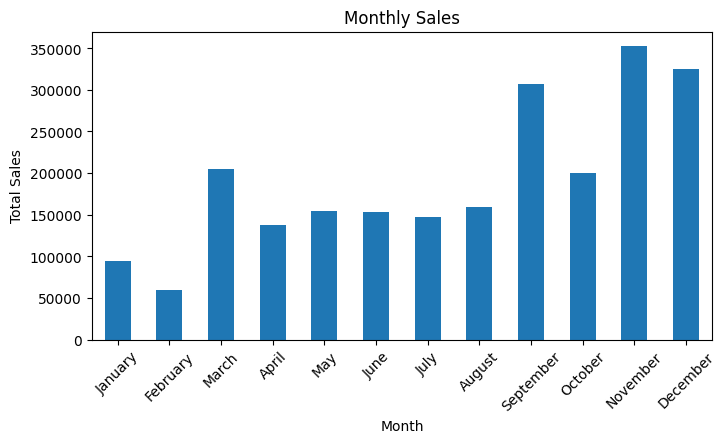

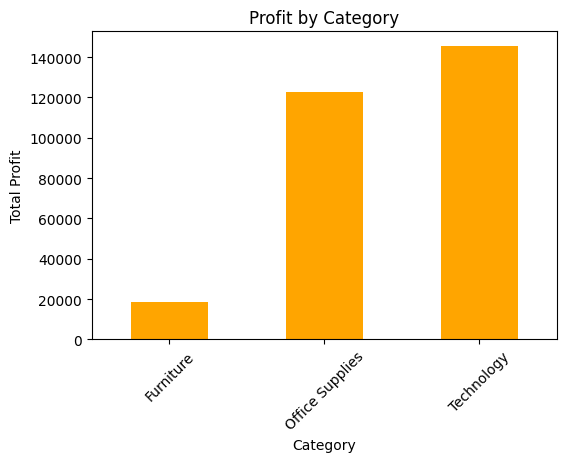

In [18]:
import matplotlib.pyplot as plt

# Sales by Month
df.groupby("Month")["Sales"].sum().reindex(
    ["January","February","March","April","May","June","July",
     "August","September","October","November","December"]
).plot(kind="bar", figsize=(8,4), title="Monthly Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

# Profit by Category
df.groupby("Category")["Profit"].sum().plot(kind="bar", color="orange", figsize=(6,4), title="Profit by Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


In [19]:
print("\n FINAL AUTO-GENERATED DATA STORY \n")
print(summary_text)

for line in insights + cat_insights + time_insights:
    print(line)



 FINAL AUTO-GENERATED DATA STORY 

The dataset contains 9994 rows and 21 columns.
 The average Sales is 229.86.
 The maximum Sales is 22638.48.
 The minimum Sales is 0.44.
 The average Profit is 28.66.
 The maximum Profit is 8399.98.
 The minimum Profit is -6599.98.
 The average Quantity is 3.79.
 The maximum Quantity is 14.00.
 The minimum Quantity is 1.00.
 The average Discount is 0.16.
 The maximum Discount is 0.80.
 The minimum Discount is 0.00.
The column 'Region' has 4 unique values.
 The most common value in 'Region' is 'West'.
The column 'Category' has 3 unique values.
 The most common value in 'Category' is 'Office Supplies'.
The column 'Sub-Category' has 17 unique values.
 The most common value in 'Sub-Category' is 'Binders'.
The column 'Ship Mode' has 4 unique values.
 The most common value in 'Ship Mode' is 'Standard Class'.
 The highest Sales occurred in November.
 The best performing year was 2018.
